# Understanding Mall customers

In this exercise, you work for a consulting firm as data scientist. In this scenario, your client is the owner of a Mall and he wants to understand the customers who can easily buy.  

You dispose of a dataset from the mall dataset with 5 features :
- CustomerID of the customer
- Gender of the customer
- Age of the customer
- Annual Income of the customer in k$
- Spending Score assigned by the mall based on customer behavior and spending nature (1-99)


You have one day to perform this analysis

In [151]:
#Import librairie 
import pandas as pd
import numpy as np


import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from sklearn.metrics import silhouette_samples, silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage

In [152]:
mall_df = pd.read_csv('C:/Users/User/Desktop/Analyse de client/Mall_customers.txt')
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Customer Segmentation using different clustering methods

Try to perform different Clustering methods (e.g. k-means, agglomerative, DBSCAN, Gaussian) to create clusters and understand behaviors

https://machinelearningmastery.com/clustering-algorithms-with-python/

https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

# EDA

In [153]:
mall_df.shape

(200, 5)

In [154]:
mall_df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age', ylabel='Density'>

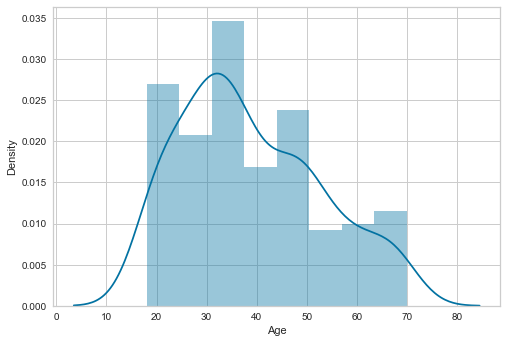

In [155]:
sns.distplot(mall_df["Age"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

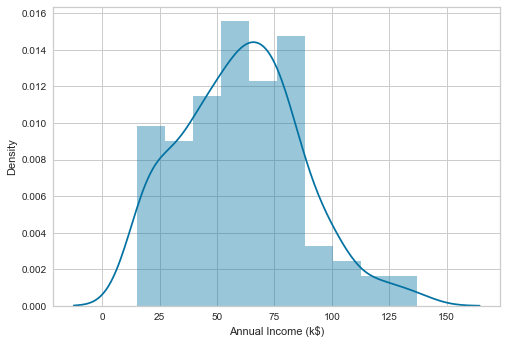

In [156]:
sns.distplot(mall_df["Annual Income (k$)"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

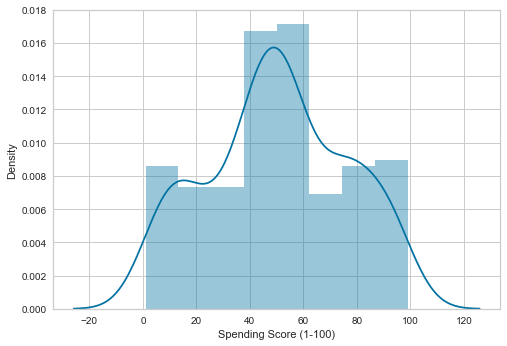

In [157]:
sns.distplot(mall_df["Spending Score (1-100)"])

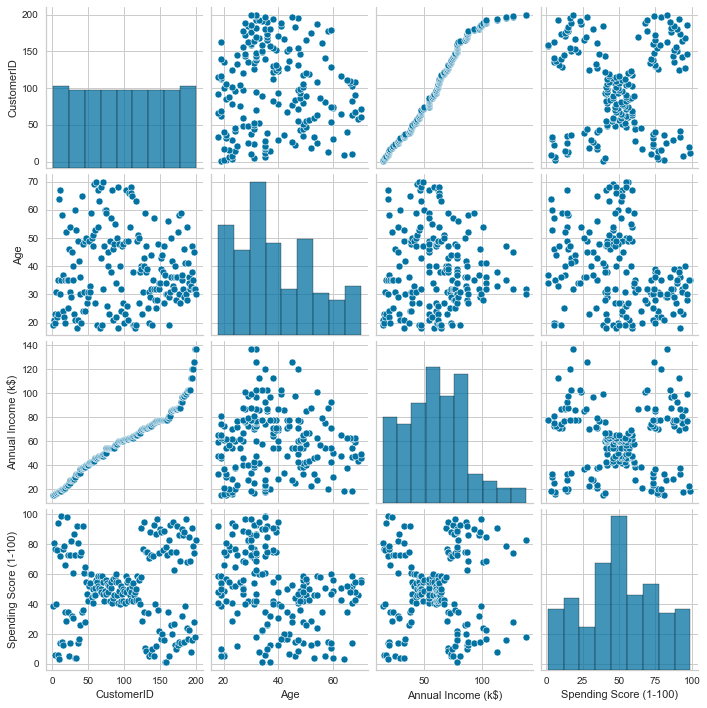

In [158]:
sns.pairplot(mall_df)

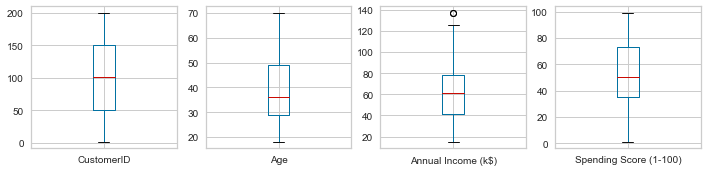

In [159]:
mall_df.plot(kind='box', subplots=True, layout=(4, 4), figsize = (12, 12));

<AxesSubplot:>

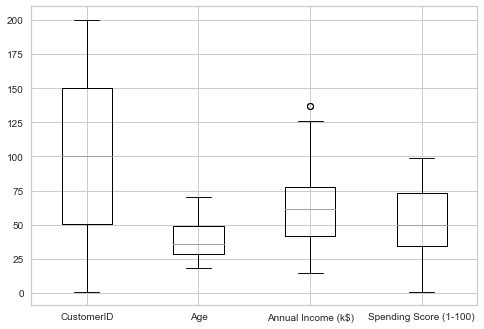

In [160]:
mall_df.boxplot()

In [161]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
mall_df['Gender']= label_encoder.fit_transform(mall_df['Gender'])
 
mall_df['Gender'].unique()

array([1, 0])

In [162]:
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


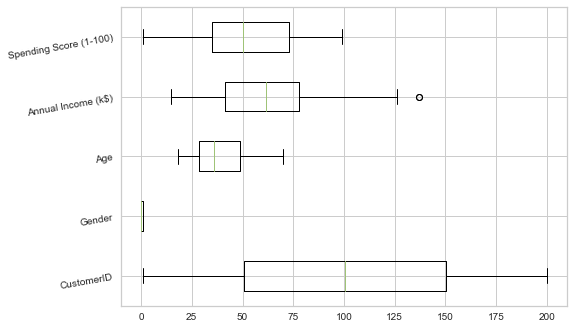

In [163]:
columns = list(mall_df.columns)
fig, ax = plt.subplots()
ax.boxplot(mall_df , vert=0,)
plt.yticks([1,2,3,4,5], columns, rotation = 10)
plt.show()

## k-means Clustering 

In [164]:
#Import librairie 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [165]:
mall_Kmean = mall_df.copy()

In [166]:
# mall_Kmean = pd.get_dummies(mall_Kmean, columns=['Gender'], prefix=["sex"])
# mall_Kmean.head()

In [167]:
#Specify columns to scale
col_names = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
features = mall_Kmean[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [168]:
#introducing scaled values to df
mall_Kmean[col_names] = features
mall_Kmean

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,-1.424569,-1.738999,-0.434801
1,2,1,-1.281035,-1.738999,1.195704
2,3,0,-1.352802,-1.700830,-1.715913
3,4,0,-1.137502,-1.700830,1.040418
4,5,0,-0.563369,-1.662660,-0.395980
...,...,...,...,...,...
195,196,0,-0.276302,2.268791,1.118061
196,197,0,0.441365,2.497807,-0.861839
197,198,1,-0.491602,2.497807,0.923953
198,199,1,-0.491602,2.917671,-1.250054


In [169]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(mall_Kmean)
    distortions.append(kmeanModel.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



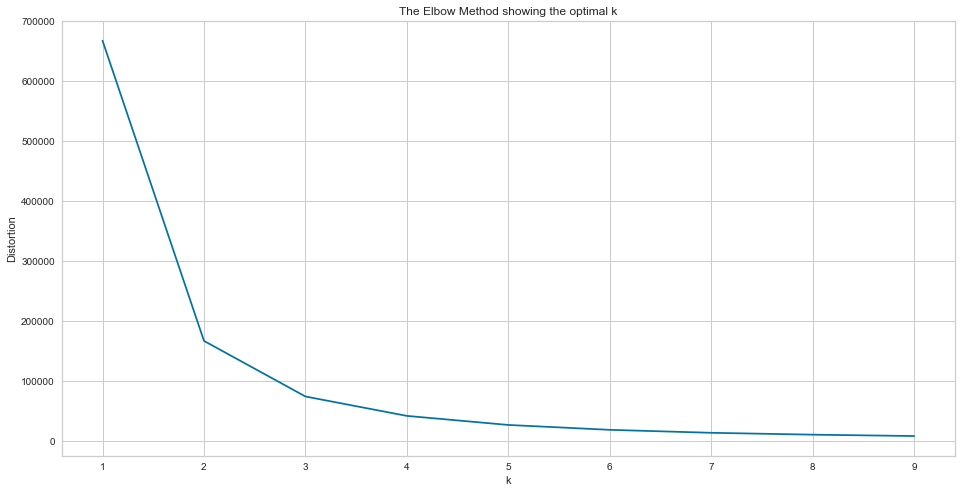

In [170]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [171]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [172]:
# visualizer = KElbowVisualizer(kmeanModel, k =(1,8))
# visualizer.show()

# model_km = KMeans(random_state=4)
# visualizer = KElbowVisualizer(model_km, k =(1,8))
# visualizer.fit(df)
# visualizer.show()

In [173]:
visualizer = KElbowVisualizer(kmeanModel, k=(1,10))


In [174]:
X = mall_Kmean
mall_Kmean.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,-1.424569,-1.738999,-0.434801
1,2,1,-1.281035,-1.738999,1.195704
2,3,0,-1.352802,-1.700830,-1.715913
3,4,0,-1.137502,-1.700830,1.040418
4,5,0,-0.563369,-1.662660,-0.395980


C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



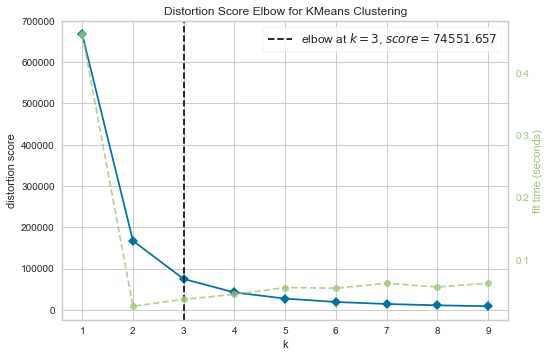

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [175]:
X = mall_Kmean
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In [176]:
kmeans = mall_Kmean

kmeansed = KMeans(n_clusters =3,init='k-means++').fit(kmeans)
kmeansed.labels_
mall_df['kmeans_cluster'] = kmeansed.predict(kmeans)
mall_Kmean['kmeans_cluster'] = kmeansed.predict(kmeans)

In [177]:
mall_Kmean.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans_cluster
0,1,1,-1.424569,-1.738999,-0.434801,0
1,2,1,-1.281035,-1.738999,1.195704,0
2,3,0,-1.352802,-1.700830,-1.715913,0
3,4,0,-1.137502,-1.700830,1.040418,0
4,5,0,-0.563369,-1.662660,-0.395980,0


In [178]:
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans_cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0


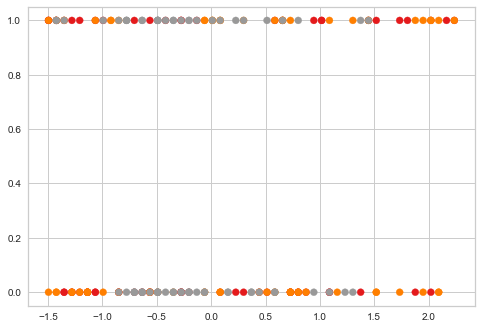

In [179]:
plt.scatter(kmeans["Age"], kmeans["Gender"], c = kmeans["kmeans_cluster"], cmap = plt.cm.Set1)

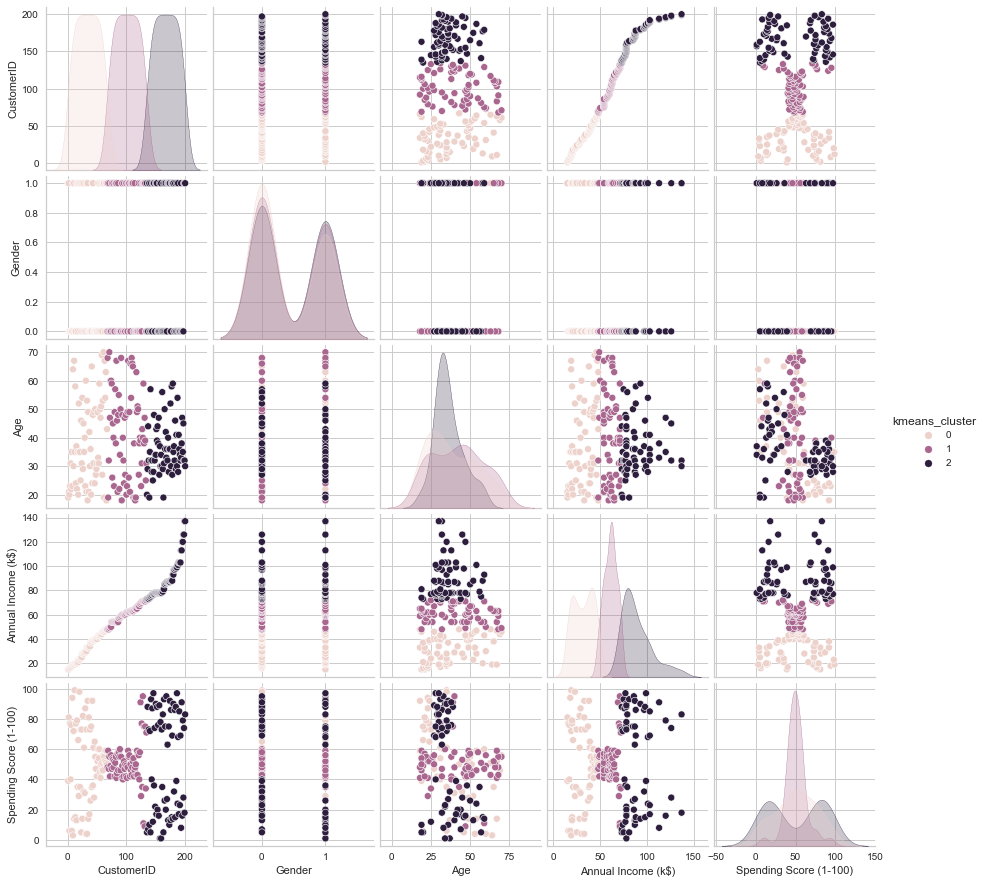

In [180]:
sns.pairplot(mall_df, hue="kmeans_cluster")

In [181]:
mall_df[mall_df["kmeans_cluster"] == 0].describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans_cluster
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.0
mean,34.000000,0.402985,38.313433,31.880597,50.164179,0.0
std,19.485037,0.494200,15.323985,10.633740,26.210452,0.0
min,1.000000,0.000000,18.000000,15.000000,3.000000,0.0
25%,17.500000,0.000000,24.000000,21.000000,33.500000,0.0
50%,34.000000,0.000000,35.000000,33.000000,51.000000,0.0
75%,50.500000,1.000000,50.000000,41.000000,73.000000,0.0
max,67.000000,1.000000,70.000000,48.000000,99.000000,0.0


In [182]:
mall_df[mall_df["kmeans_cluster"] == 1].describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans_cluster
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.0
mean,101.000000,0.447761,41.910448,60.805970,50.298507,1.0
std,19.485037,0.501017,15.981743,6.825174,13.609283,0.0
min,68.000000,0.000000,18.000000,48.000000,9.000000,1.0
25%,84.500000,0.000000,26.500000,54.000000,43.000000,1.0
50%,101.000000,0.000000,40.000000,62.000000,49.000000,1.0
75%,117.500000,1.000000,52.500000,65.000000,55.500000,1.0
max,134.000000,1.000000,70.000000,72.000000,95.000000,1.0


In [183]:
mall_df[mall_df["kmeans_cluster"] == 2].describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans_cluster
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.0
mean,167.500000,0.469697,36.287879,89.424242,50.136364,2.0
std,19.196354,0.502905,9.110881,16.000058,33.999496,0.0
min,135.000000,0.000000,19.000000,73.000000,1.000000,2.0
25%,151.250000,0.000000,30.000000,78.000000,16.250000,2.0
50%,167.500000,0.000000,34.000000,86.000000,51.500000,2.0
75%,183.750000,1.000000,41.000000,98.000000,84.500000,2.0
max,200.000000,1.000000,59.000000,137.000000,97.000000,2.0


In [184]:
# Trois clusters par rapport principalement à Annual Income (k$)
# Cluster 2: en moyenne 31K, varie entre 15K / 48K 
# Cluster 1: en moyenne 60K, varie entre 48K / 72K
# Cluster 2: en moyenne 90K, varie entre 73K / 137K

In [185]:
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans_cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0


In [65]:
#Scoredesilhouette
silhouette_score(X, mall_Kmean['kmeans_cluster'])

0.5813113698518422

## Agglomerative Clustering

In [ ]:
#Partie pas complète, passez à l'algorithme suivant DBSCAN

In [56]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [66]:
mall_agglo = mall_Kmean.copy()
mall_agglo = mall_agglo.drop("kmeans_cluster", axis=1)
mall_agglo.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,-1.424569,-1.738999,-0.434801
1,2,1,-1.281035,-1.738999,1.195704
2,3,0,-1.352802,-1.700830,-1.715913
3,4,0,-1.137502,-1.700830,1.040418
4,5,0,-0.563369,-1.662660,-0.395980


In [85]:
mall_agglo.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
X = mall_agglo

In [186]:
# from numpy import unique
# from numpy import where
# from sklearn.datasets import make_classification
# from sklearn.cluster import AgglomerativeClustering
# from matplotlib import pyplot
# # define dataset
# #X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# # define the model
# model = AgglomerativeClustering(n_clusters=2)
# # fit model and predict clusters
# yhat = model.fit_predict(X)
# # retrieve unique clusters
# clusters = unique(yhat)
# # create scatter plot for samples from each cluster
# for cluster in clusters:
# # get row indexes for samples with this cluster
#     row_ix = where(yhat == cluster)
# # create scatter of these samples
#     pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# # show the plot
# pyplot.show()

In [105]:
# dendrogram = sch.dendrogram(sch.linkage(mall_agglo, method = 'ward'))
# plt.title('Dendrogam', fontsize = 20)
# plt.xlabel('Customers')
# plt.ylabel('Ecuclidean Distance')
# plt.show()

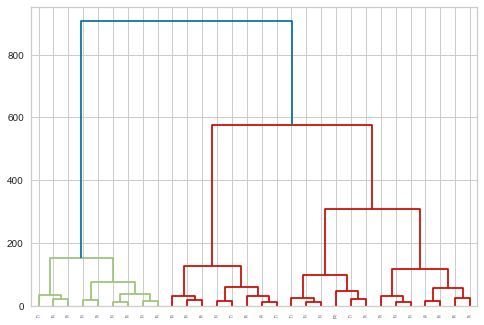

In [139]:
# Libraries
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
 

df = mall_agglo.set_index('Gender')
 
# Calculate the distance between each sample
Z = linkage(df, 'ward')
 
# Plot with Custom leaves
dendrogram(Z, leaf_rotation=90, leaf_font_size=3, labels=mall_agglo.T.columns, truncate_mode = "lastp")

# Show the graph
plt.show()

In [ ]:
mall_agglo.colums

In [82]:
Z = linkage(mall_agglo, 'ward')

## DBSCAN

In [89]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [100]:
mall_agglo.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,-1.424569,-1.738999,-0.434801
1,2,1,-1.281035,-1.738999,1.195704
2,3,0,-1.352802,-1.700830,-1.715913
3,4,0,-1.137502,-1.700830,1.040418
4,5,0,-0.563369,-1.662660,-0.395980


In [128]:
X = mall_agglo[["Age", "Spending Score (1-100)","Annual Income (k$)"]]
X.head()

,Age,Spending Score (1-100),Annual Income (k$)
0,-1.424569,-0.434801,-1.738999
1,-1.281035,1.195704,-1.738999
2,-1.352802,-1.715913,-1.700830
3,-1.137502,1.040418,-1.700830
4,-0.563369,-0.395980,-1.662660


In [129]:
# Compute DBSCAN
db = DBSCAN(eps=0.6, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [110]:
# Cluster / silouhete 

In [130]:
n_clusters_

4

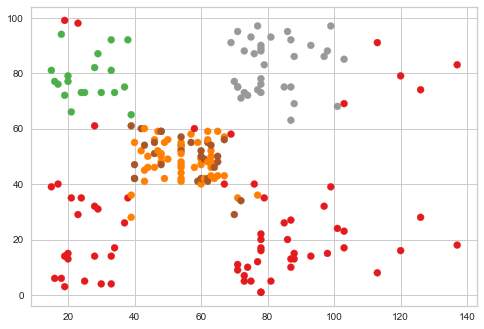

In [131]:
plt.scatter(mall_df["Annual Income (k$)"], mall_df["Spending Score (1-100)"], c = labels, cmap = plt.cm.Set1)

In [138]:
import matplotlib

In [141]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [142]:
import plotly.graph_objects as go

In [144]:
import plotly.offline as py

In [147]:
data = mall_df

In [148]:
data['labels'] =  labels
trace1 = go.Scatter3d(
    x= data['Age'],
    y= data['Spending Score (1-100)'],
    z= data['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = data['labels'], 
        size= 10,
        line=dict(
            color= data['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'Character vs Gender vs Alive or not',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

In [ ]:
# Cluster 1: Age moyen 30 ans, hauts revenus(à partir de 60K), grandes dépenses(score 80)
# Cluster 2: Age moyen 50ans, hauts revenus, faibles dépenses(score de 20)
# Cluster 3: Age moyen 40 ans, revenus moyens, dépenses moyennes(score entre 40 et 60)
# Cluster 4: Age moyen 30 ans, faibles revenus, faibles dépenses 
# Cluster 5: Age moyen 25 ans, faibles revenus, grandes dépenses 

In [68]:
from itertools import product

In [79]:
X= mall_df

X = X.drop("kmeans_cluster", axis=1)

X.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [80]:
eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [81]:
DBSCAN_params

[(8.0, 3),
 (8.0, 4),
 (8.0, 5),
 (8.0, 6),
 (8.0, 7),
 (8.0, 8),
 (8.0, 9),
 (8.25, 3),
 (8.25, 4),
 (8.25, 5),
 (8.25, 6),
 (8.25, 7),
 (8.25, 8),
 (8.25, 9),
 (8.5, 3),
 (8.5, 4),
 (8.5, 5),
 (8.5, 6),
 (8.5, 7),
 (8.5, 8),
 (8.5, 9),
 (8.75, 3),
 (8.75, 4),
 (8.75, 5),
 (8.75, 6),
 (8.75, 7),
 (8.75, 8),
 (8.75, 9),
 (9.0, 3),
 (9.0, 4),
 (9.0, 5),
 (9.0, 6),
 (9.0, 7),
 (9.0, 8),
 (9.0, 9),
 (9.25, 3),
 (9.25, 4),
 (9.25, 5),
 (9.25, 6),
 (9.25, 7),
 (9.25, 8),
 (9.25, 9),
 (9.5, 3),
 (9.5, 4),
 (9.5, 5),
 (9.5, 6),
 (9.5, 7),
 (9.5, 8),
 (9.5, 9),
 (9.75, 3),
 (9.75, 4),
 (9.75, 5),
 (9.75, 6),
 (9.75, 7),
 (9.75, 8),
 (9.75, 9),
 (10.0, 3),
 (10.0, 4),
 (10.0, 5),
 (10.0, 6),
 (10.0, 7),
 (10.0, 8),
 (10.0, 9),
 (10.25, 3),
 (10.25, 4),
 (10.25, 5),
 (10.25, 6),
 (10.25, 7),
 (10.25, 8),
 (10.25, 9),
 (10.5, 3),
 (10.5, 4),
 (10.5, 5),
 (10.5, 6),
 (10.5, 7),
 (10.5, 8),
 (10.5, 9),
 (10.75, 3),
 (10.75, 4),
 (10.75, 5),
 (10.75, 6),
 (10.75, 7),
 (10.75, 8),
 (10.75, 9),
 (11.0

In [84]:
no_of_clusters

[18, 6, 2, 1]

In [88]:
no_of_clusters

[18, 6, 2, 1]

In [97]:
#silhouette_score(X, kmeans['kmeans_cluster'])

In [98]:
kmeansed = KMeans(n_clusters =3,init='k-means++').fit(kmeans)
kmeansed.labels_
mall_df['kmeans_cluster'] = kmeansed.predict(kmeans)
mall_Kmean['kmeans_cluster'] = kmeansed.predict(kmeans)

In [187]:
# no_of_clusters = []
# sil_score = []
# for p in DBSCAN_params:
#     DBSclustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)
#     no_of_clusters.append(len(np.unique(DBSclustering.labels_)))
#     sil_score.append(silhouette_score(X, DBSclustering.labels_))

## Gaussian

# Conclusions

In [ ]:
#Présentation 7min du tableau 